In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy
import statsmodels.formula.api as smf
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import datetime

In [2]:
cd C:\Users\User\Desktop\ML Projects1

[WinError 2] The system cannot find the file specified: 'C:\\Users\\User\\Desktop\\ML Projects1'
C:\Users\User\OneDrive\Desktop\Data Science Projects\Final ML Projects\Stock Price Prediction


In [3]:
df=pd.read_csv("Stock_Data.csv")
df.head()

,time,open,high,low,close,volume
0,3/25/2022 19:19,131.300,131.30,131.300,131.30,718
1,3/25/2022 19:18,131.300,131.30,131.300,131.30,282
2,3/25/2022 17:50,131.300,131.30,131.300,131.30,100
3,3/25/2022 16:59,131.340,131.35,131.340,131.35,1427
4,3/25/2022 16:42,131.326,131.35,131.326,131.35,1326


In [4]:
df.shape

(216883, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216883 entries, 0 to 216882
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   time    216883 non-null  object 
 1   open    216883 non-null  float64
 2   high    216883 non-null  float64
 3   low     216883 non-null  float64
 4   close   216883 non-null  float64
 5   volume  216883 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 9.9+ MB


In [6]:
back=df.copy()

In [7]:
back

,time,open,high,low,close,volume
0,3/25/2022 19:19,131.300000,131.300000,131.300000,131.300000,718
1,3/25/2022 19:18,131.300000,131.300000,131.300000,131.300000,282
2,3/25/2022 17:50,131.300000,131.300000,131.300000,131.300000,100
3,3/25/2022 16:59,131.340000,131.350000,131.340000,131.350000,1427
4,3/25/2022 16:42,131.326000,131.350000,131.326000,131.350000,1326
...,...,...,...,...,...,...
216878,4/6/2020 7:27,95.385037,95.385037,95.385037,95.385037,854
216879,4/6/2020 7:25,94.530379,94.530379,94.530379,94.530379,450
216880,4/6/2020 7:08,94.703037,94.703037,94.703037,94.703037,436
216881,4/6/2020 7:02,95.479999,95.479999,95.479999,95.479999,575


In [8]:
df.describe()

,open,high,low,close,volume
count,216883.000000,216883.000000,216883.000000,216883.000000,2.168830e+05
mean,118.568888,118.610088,118.527167,118.568678,1.123028e+04
std,11.032437,11.030216,11.034414,11.032587,2.550945e+04
min,93.893379,94.001154,93.878046,93.894886,0.000000e+00
25%,109.270433,109.306157,109.232227,109.272002,3.895500e+03
50%,116.919510,116.953384,116.880199,116.919510,6.786000e+03
75%,129.697796,129.731458,129.666234,129.700000,1.175100e+04
max,140.686324,140.778433,140.363945,140.658692,2.110106e+06


In [9]:
df.columns

Index(['time', 'open', 'high', 'low', 'close', 'volume'], dtype='object')

In [10]:
df1=pd.DataFrame(df,columns=['time','close'])
df1.head()

,time,close
0,3/25/2022 19:19,131.30
1,3/25/2022 19:18,131.30
2,3/25/2022 17:50,131.30
3,3/25/2022 16:59,131.35
4,3/25/2022 16:42,131.35


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216883 entries, 0 to 216882
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   time    216883 non-null  object 
 1   close   216883 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.3+ MB


In [12]:
df1['time']=pd.to_datetime(df1['time'])

In [13]:
df1['Date']=df1['time'].dt.date
df1.head()

,time,close,Date
0,2022-03-25 19:19:00,131.30,2022-03-25
1,2022-03-25 19:18:00,131.30,2022-03-25
2,2022-03-25 17:50:00,131.30,2022-03-25
3,2022-03-25 16:59:00,131.35,2022-03-25
4,2022-03-25 16:42:00,131.35,2022-03-25


In [14]:
df1.drop(['time'],axis=1,inplace=True)
df1.head()

,close,Date
0,131.30,2022-03-25
1,131.30,2022-03-25
2,131.30,2022-03-25
3,131.35,2022-03-25
4,131.35,2022-03-25


In [15]:
df3=df1.groupby('Date', as_index=False)['close'].mean()

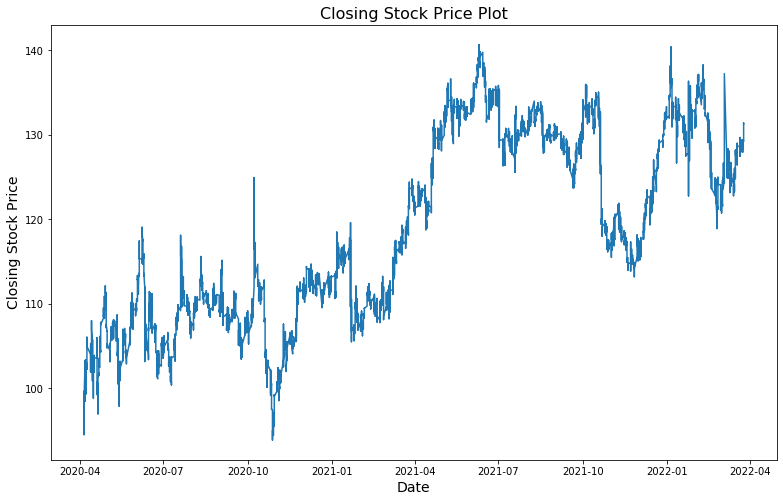

In [16]:
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(13,8))
ax.plot(df1['Date'], df1['close'])

# Format the ticks
#ax.xaxis.set_major_locator(years)
#ax.xaxis.set_major_formatter(yearsFmt)

plt.title('Closing Stock Price Plot', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price', fontsize=14)

# Show plot
plt.show()

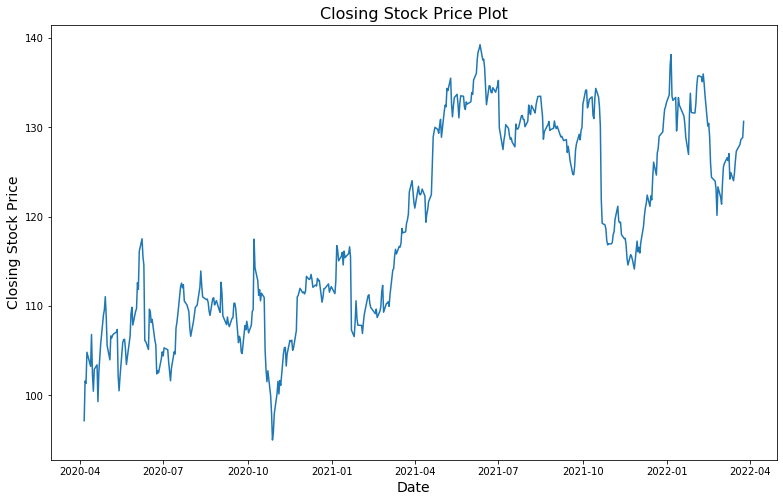

In [17]:
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(13,8))
ax.plot(df3['Date'], df3['close'])

# Format the ticks
#ax.xaxis.set_major_locator(years)
#ax.xaxis.set_major_formatter(yearsFmt)

plt.title('Closing Stock Price Plot', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price', fontsize=14)
#ax.plot(df3['Date'], df3['close'],c='red')

# Show plot
plt.show()

In [18]:
df1.head()

,close,Date
0,131.30,2022-03-25
1,131.30,2022-03-25
2,131.30,2022-03-25
3,131.35,2022-03-25
4,131.35,2022-03-25


In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216883 entries, 0 to 216882
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   close   216883 non-null  float64
 1   Date    216883 non-null  object 
dtypes: float64(1), object(1)
memory usage: 3.3+ MB


In [20]:
df3.head()

,Date,close
0,2020-04-06,97.155860
1,2020-04-07,101.590365
2,2020-04-08,101.330077
3,2020-04-09,104.823744
4,2020-04-13,103.246634


In [21]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 0 to 497
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    498 non-null    object 
 1   close   498 non-null    float64
dtypes: float64(1), object(1)
memory usage: 11.7+ KB


In [22]:
#df1['Date'] = df1['Date'].astype(np.float64)
df2=back
df2.head()

,time,open,high,low,close,volume
0,3/25/2022 19:19,131.300,131.30,131.300,131.30,718
1,3/25/2022 19:18,131.300,131.30,131.300,131.30,282
2,3/25/2022 17:50,131.300,131.30,131.300,131.30,100
3,3/25/2022 16:59,131.340,131.35,131.340,131.35,1427
4,3/25/2022 16:42,131.326,131.35,131.326,131.35,1326


In [23]:
df2=pd.DataFrame(df2,columns=['time','close'])
df2.head()

,time,close
0,3/25/2022 19:19,131.30
1,3/25/2022 19:18,131.30
2,3/25/2022 17:50,131.30
3,3/25/2022 16:59,131.35
4,3/25/2022 16:42,131.35


In [24]:
train,test=train_test_split(df1,test_size=0.2)

In [25]:
# Reshape index column to 2D array for .fit() method
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['close']

In [26]:
# Create LinearRegression Object
model = LinearRegression()
# Fit linear model using the train data set
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
# The coefficient
print('Slope: ', np.asscalar(np.squeeze(model.coef_)))
# The Intercept
print('Intercept: ', model.intercept_)

Slope:  -0.00013808524812845976
Intercept:  133.55765865631756


C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  


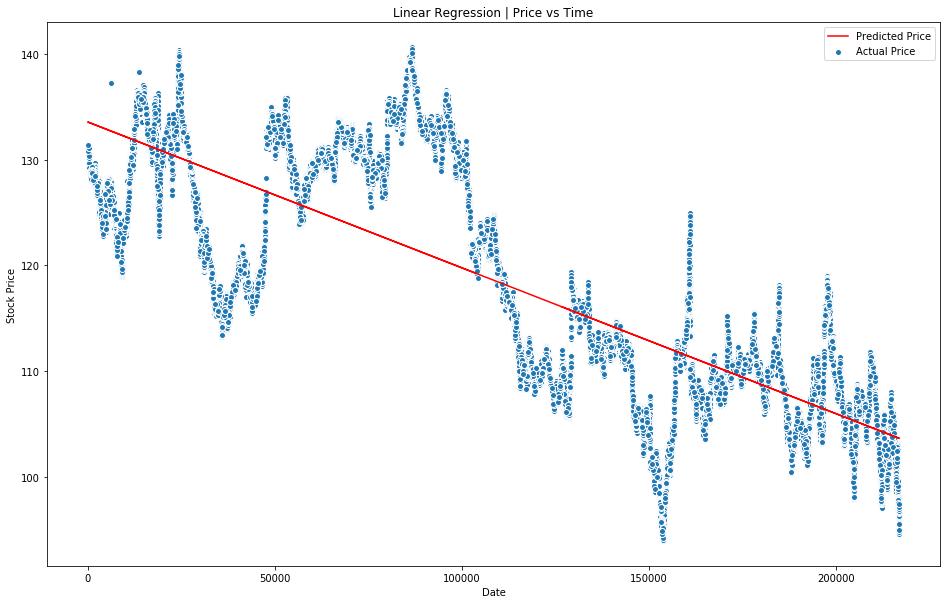

In [28]:
# Train set graph
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.scatter(X_train, y_train, edgecolor='w', label='Actual Price')
plt.plot(X_train, model.predict(X_train), color='r', label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [29]:
# Create test arrays
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['close']

In [30]:
# Generate array with predicted values
y_pred = model.predict(X_test)

In [31]:
# Calculate and print values of MAE, MSE, RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 5.499816731312376
Mean Squared Error: 47.0773011658382
Root Mean Squared Error: 6.861290051137483


In [32]:
# Coefficient of determination
print('R2: ', metrics.r2_score(y_test, y_pred))

R2:  0.6132686000623984


In [33]:
from sklearn.metrics import explained_variance_score

print('Variance score: {}'.format(explained_variance_score(y_test, y_pred)))

Variance score: 0.6133140587205029


In [34]:
n=len(df1)
n

216883

### n= number of data points
### p=number of indepandant features

In [35]:
n=len(df1)
p=1
r2score=metrics.r2_score(y_test, y_pred)

In [36]:
n

216883

In [37]:
r2score

0.6132686000623984

In [38]:
adjusted_r2_score=1-((1-r2score)*(n-1))/(n-p-1)
print('Adjusted R2 score: {}'.format(adjusted_r2_score))

Adjusted R2 score: 0.6132668169121919


### Random Forest Regressor

In [39]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
rfr_prediction = rfr.predict(X_test)

### Calculating error metrics for Random Forest 

In [40]:
# Calculate and print values of MAE, MSE, RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, rfr_prediction))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, rfr_prediction))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rfr_prediction)))

Mean Absolute Error: 0.050186458517684975
Mean Squared Error: 0.008748351534040886
Root Mean Squared Error: 0.09353262283311041


### Calculating Coefficient of determination (R2 Score) for Random Forest Model 

In [41]:
print(metrics.r2_score(y_test, rfr_prediction))

0.9999281338956966


In [42]:
rfr_r2_score=metrics.r2_score(y_test, rfr_prediction)

### Calculating Adjusted R square for Random Forest

In [43]:
rfr_adjusted_r2_score=1-((1-rfr_r2_score)*(n-1))/(n-p-1)
print('Adjusted R2 score For Random Forest: {}'.format(rfr_adjusted_r2_score))

Adjusted R2 score For Random Forest: 0.9999281335643346


### Decision Tree Classifier

In [44]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
dtr_prediction = dtr.predict(X_test)

### Calculating error metrics for Decision Tree

In [45]:
# Calculate and print values of MAE, MSE, RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, dtr_prediction))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, dtr_prediction))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, dtr_prediction)))

Mean Absolute Error: 0.05943103858537435
Mean Squared Error: 0.013456220988306067
Root Mean Squared Error: 0.11600095253189116


### Calculating Coefficient of determination (R2 Score) for Decision Tree Model 

In [46]:
print(metrics.r2_score(y_test, dtr_prediction))

0.9998894596110693


In [47]:
dtr_r2_score=metrics.r2_score(y_test, dtr_prediction)

### Calculating Adjusted R Square for Decision Tree

In [48]:
dtr_adjusted_r2_score=1-((1-dtr_r2_score)*(n-1))/(n-p-1)
print('Adjusted R2 score For Decision Tree: {}'.format(dtr_adjusted_r2_score))

Adjusted R2 score For Decision Tree: 0.9998894591013872


The coefficient of determination of **Random Forest Classifier** is more than that of **Linear Regression** and **Decision Tree Classifier**. On the other hand, The error metrics of Random Forest are very less than that of Linear Regression and Decision Tree Classifier as well. 
So, we will take into consideration **Random Forest Classifier** model to predict stock price.